In [1]:
RawData <- read.csv("C:\\Realestate\\CleanedRE.csv", header = TRUE,
                stringsAsFactors = FALSE, strip.white = TRUE, sep = ",",
                na.strings = c("","NA"))
library("dplyr")
library("sqldf")
library("utils")
library(magrittr)
library(psych)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



In [2]:
NEWRE8 <- mutate(RawData, NewPrice = (RawData$Price/100000))  # NewPrice is a derived variable
#newprice-converted into decimal so that it looks clean on plot, divided by 1 lakh on all, uniformly-will not change data
NEWRE8$PriceRange <- ifelse(NEWRE8$NewPrice >= 1 & NEWRE8$NewPrice <= 5.89, 'VeryLow',
                            ifelse(NEWRE8$NewPrice >=5.9 & NEWRE8$NewPrice <=8.99, 'Low',
                                   ifelse(NEWRE8$NewPrice >=9.0 & NEWRE8$NewPrice <= 12.09, 'Medium',
                                          ifelse(NEWRE8$NewPrice >=12.1 & NEWRE8$NewPrice <= 15.19, 'High',
                                                 ifelse(NEWRE8$NewPrice >=15.2 & NEWRE8$NewPrice <= 18.2, 'VeryHigh',
                                                        ifelse(NEWRE8$NewPrice >=18.21, 'PeakHigh',
                                                               'something else'))))))

In [3]:
NEWRE8$Proximity <- ifelse(NEWRE8$Distance < 4, 'Inside CBD',
                           ifelse(NEWRE8$Distance >=4 & NEWRE8$Distance < 6, 'Closer to CBD',
                                  ifelse(NEWRE8$Distance >= 6.1 & NEWRE8$Distance <= 10, 'Close to CBD',
                                         ifelse(NEWRE8$Distance >= 10.1 & NEWRE8$Distance <= 12, 'Far from CBD',
                                  'Out of City'))))

In [4]:
df <- sqldf("select Suburb, Address, Rooms, Type, Method, SellerG, Distance, Postcode, Bedroom2, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, NewPrice, PriceRange, Proximity
            from NEWRE8")

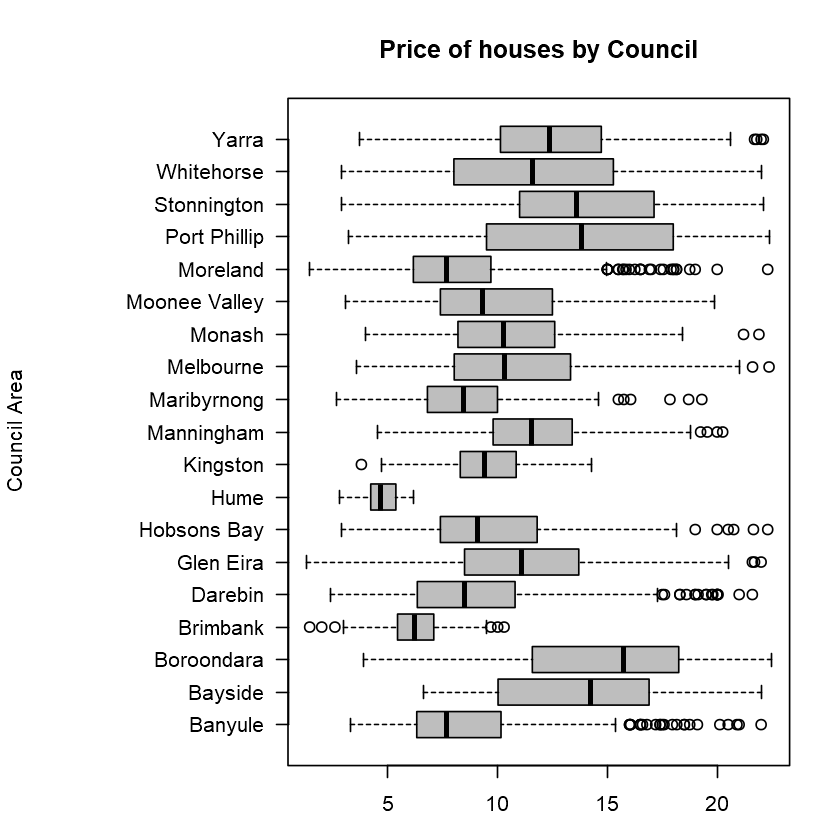

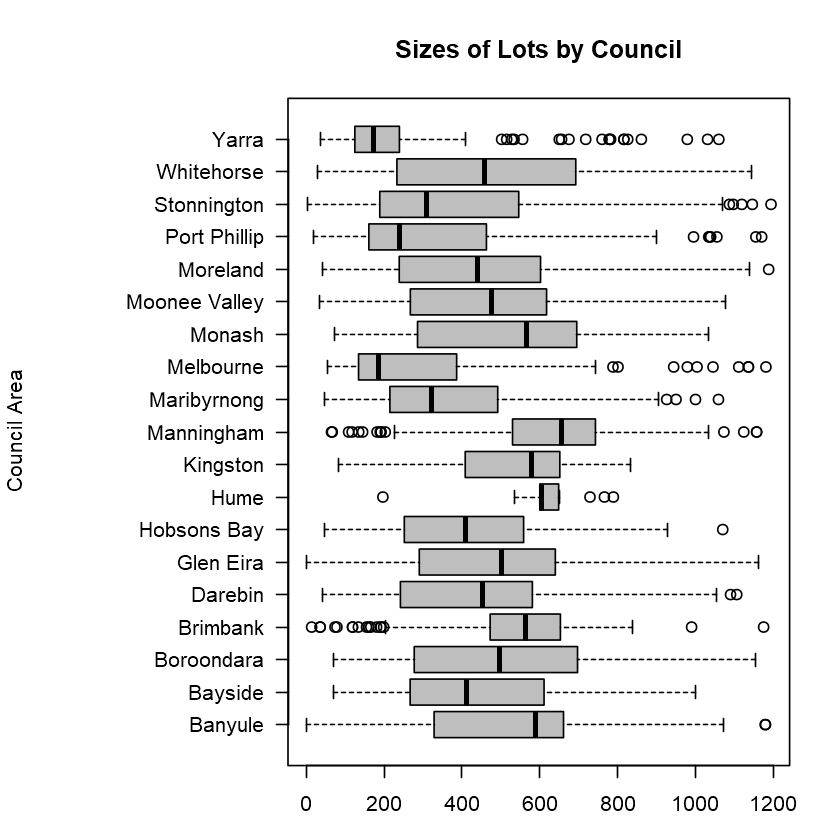

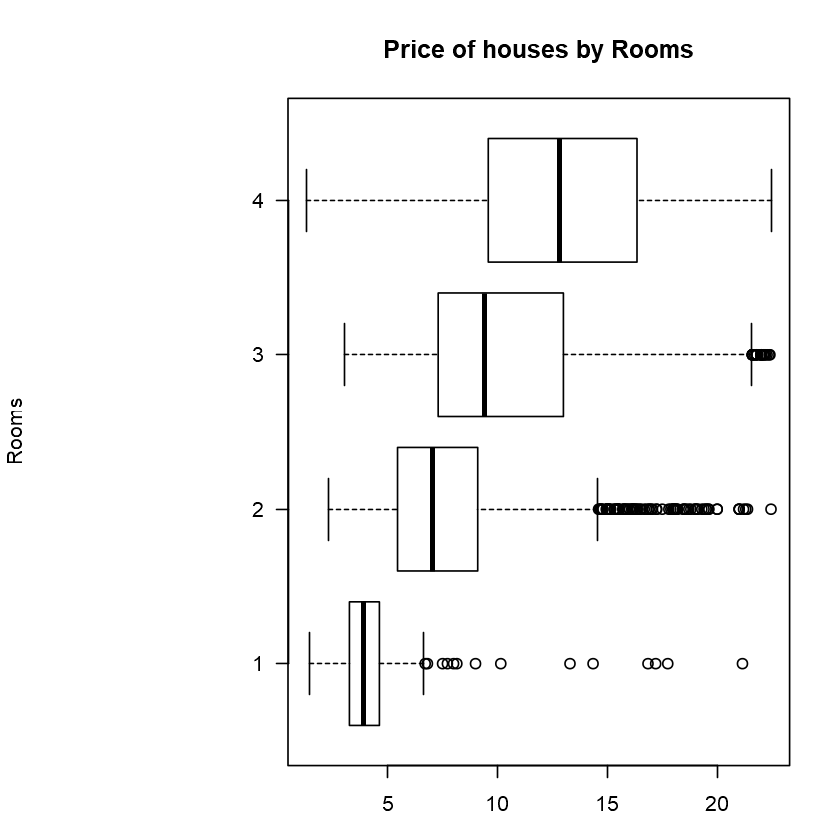

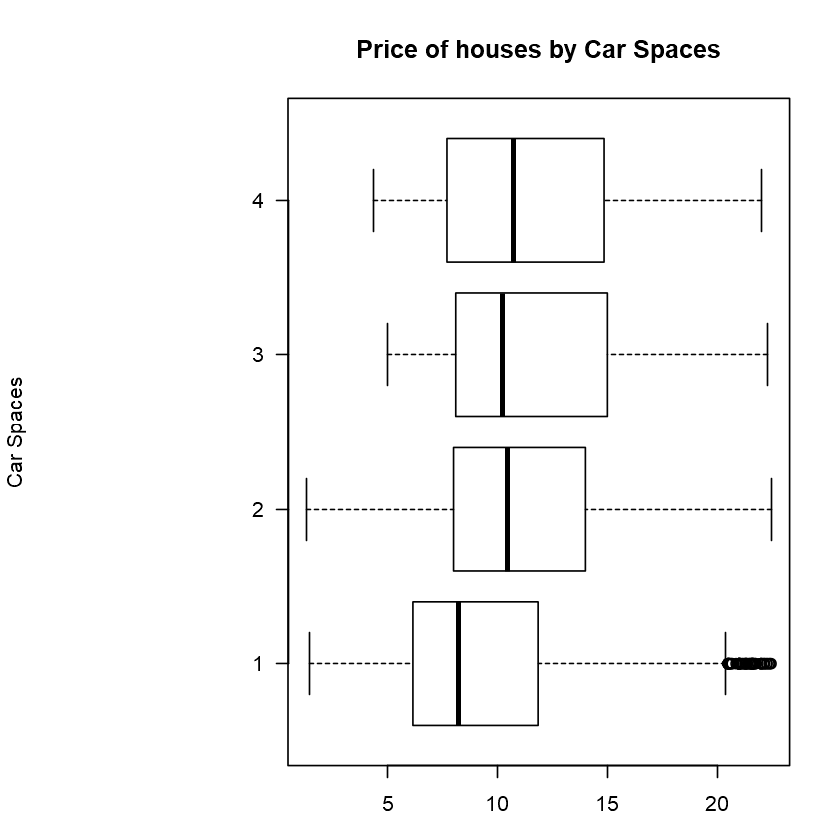

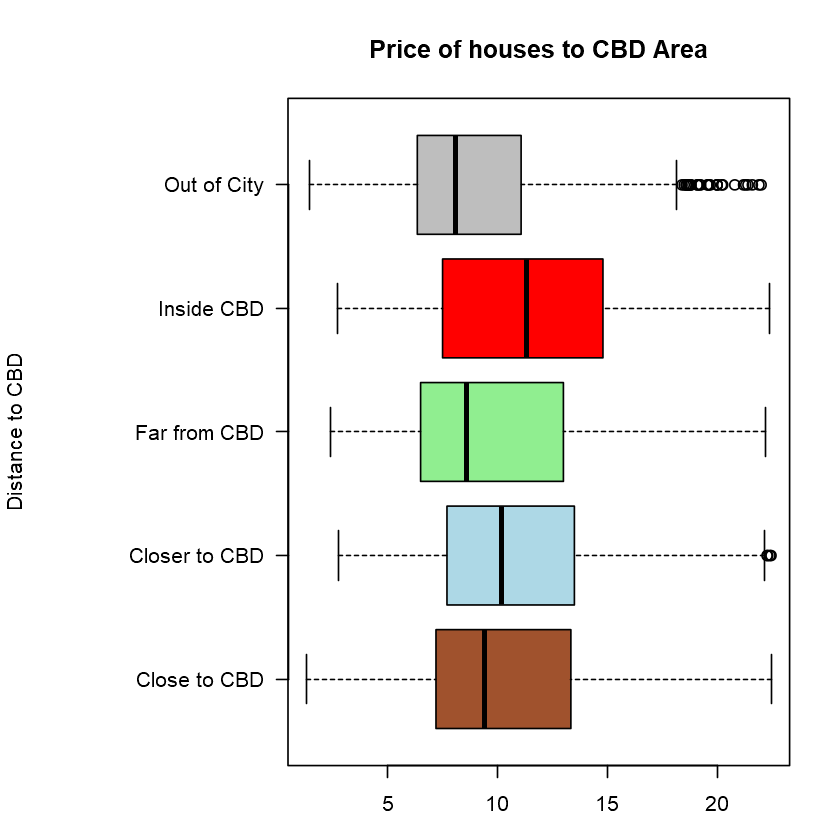

In [5]:
par(mar=c(3.1,12,4.1,2.1), mgp = c(11, 1, 0))
boxplot(df$NewPrice ~ df$CouncilArea, horizontal = TRUE, ylab = "Council Area", xlab = "Price in Lakhs", main = "Price of houses by Council", las = 1,  col=(c("grey")))
boxplot(df$Landsize ~ df$CouncilArea, horizontal = TRUE, ylab = "Council Area", xlab = "Area of each LOT", main = "Sizes of Lots by Council", las = 1,  col=(c("grey")))
boxplot(df$NewPrice ~ df$Rooms, horizontal = TRUE, ylab = "Rooms", xlab = "Price in Lakhs", main = "Price of houses by Rooms", las = 1)
boxplot(df$NewPrice ~ df$Car, horizontal = TRUE, ylab = "Car Spaces", xlab = "Price in Lakhs", main = "Price of houses by Car Spaces", las = 1)
boxplot(df$NewPrice ~ df$Proximity, horizontal = TRUE, ylab = "Distance to CBD", xlab = "Price in Lakhs", main = "Price of houses to CBD Area", las = 1, col=(c("sienna", "light blue", "light green", "red", "Grey")))
# table(NEWRE8$Distance)

,Rooms,Distance,Car,Landsize,BuildingArea,NewPrice
Rooms,1.00,0.25,0.27,0.23,0.36,0.47
Distance,0.25,1.00,0.14,0.25,0.07,-0.16
Car,0.27,0.14,1.00,0.24,0.16,0.22
Landsize,0.23,0.25,0.24,1.00,0.20,0.17
BuildingArea,0.36,0.07,0.16,0.20,1.00,0.32
NewPrice,0.47,-0.16,0.22,0.17,0.32,1.00


'data.frame':	7586 obs. of  17 variables:
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "85 Turner St" "40 Federation La" "55a Park St" "98 Charles St" ...
 $ Rooms       : int  2 3 4 2 3 2 2 2 2 1 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Method      : chr  "S" "PI" "VB" "S" ...
 $ SellerG     : chr  "Biggin" "Biggin" "Nelson" "Nelson" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 3 3 2 3 3 3 3 3 3 ...
 $ Car         : int  1 1 2 2 1 1 2 1 1 1 ...
 $ Landsize    : num  202 94 120 256 469 ...
 $ BuildingArea: num  147 147 142 107 147 ...
 $ YearBuilt   : int  1970 1970 2014 1890 1970 1970 1900 1970 1970 1970 ...
 $ CouncilArea : chr  "Yarra" "Yarra" "Yarra" "Yarra" ...
 $ NewPrice    : num  14.8 8.5 16 16.4 10 ...
 $ PriceRange  : chr  "High" "Low" "VeryHigh" "VeryHigh" ...
 $ Proximity   : chr  "Inside 

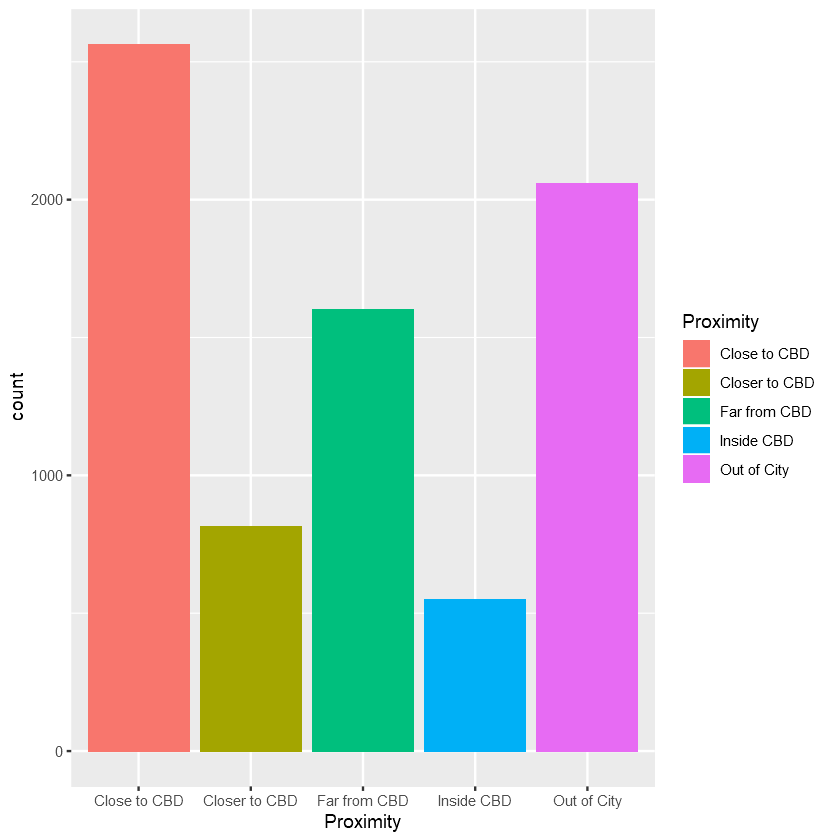

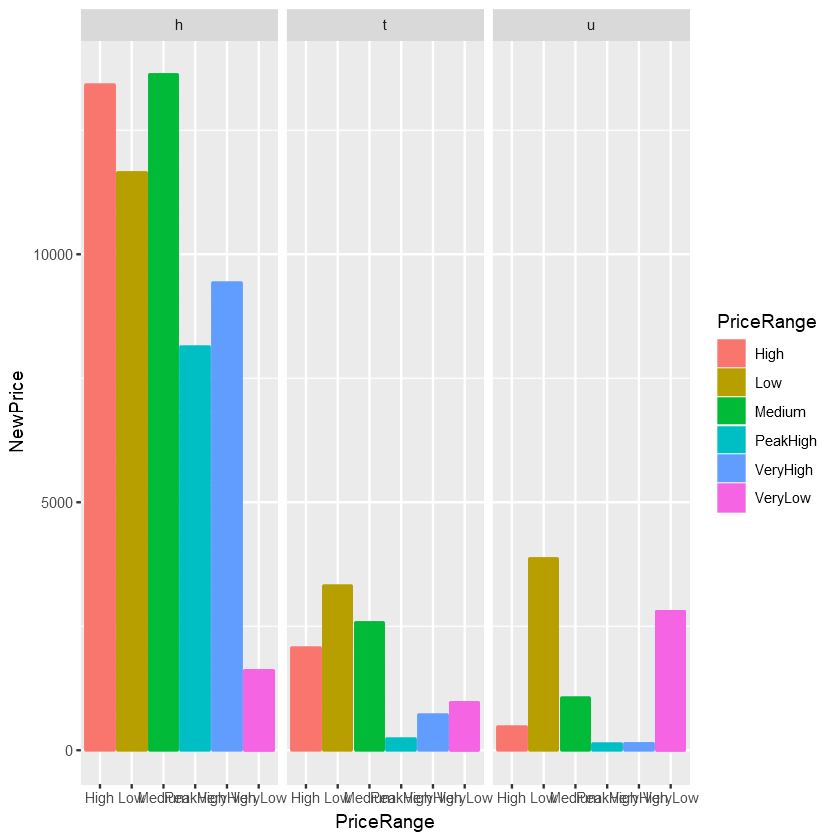

In [9]:
#corelation with every variable 
round(cor(df[,c(3,7,10,11,12,15)]),2) #upto decimal 2 round

str(df)
ggplot(df, aes(Proximity, fill = Proximity) ) +geom_bar()
ggplot(df, aes(y=NewPrice, x=PriceRange, color=PriceRange, fill=PriceRange)) + geom_bar( stat="identity") + facet_wrap(~Type)

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
"

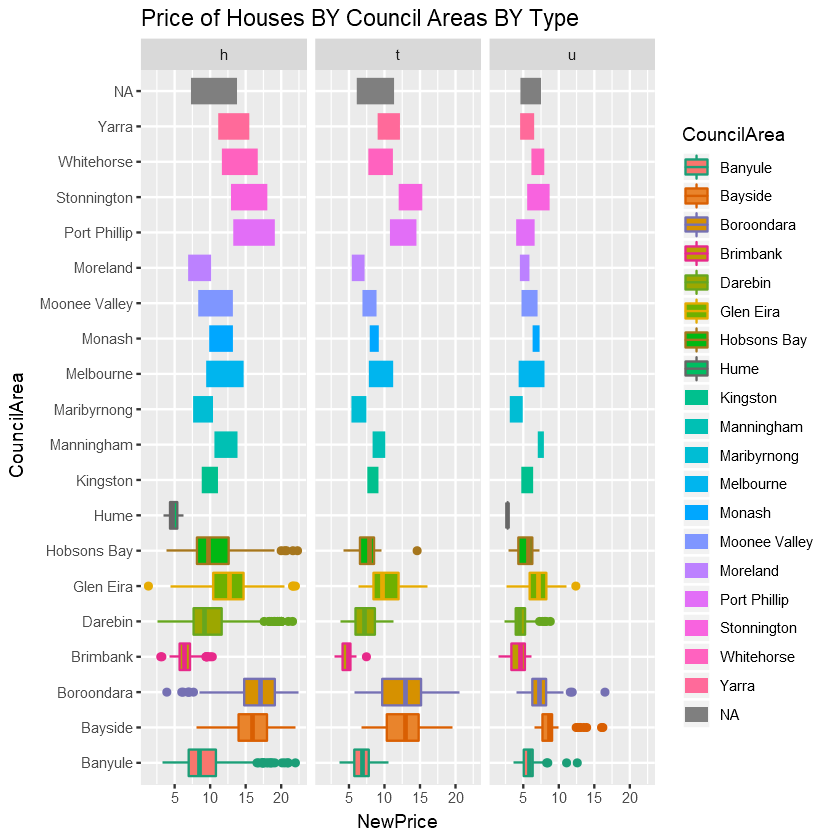

In [7]:
ggplot(df, aes(x=CouncilArea, y=NewPrice, col=CouncilArea , fill=CouncilArea)) + 
  geom_boxplot() + scale_color_brewer(palette="Dark2")+
  coord_flip()+
  facet_wrap(~Type)+
  labs(title = "Price of Houses BY Council Areas BY Type")